In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    connection = mysql.connector.connect(
        host = 'localhost',
        user = 'root',
        password = 'sqltraining', consume_results = True)
    
except mysql.connector.Error as Error:
    print("Could not connect to the server. Error: {}".format(Error))
    
if connection.is_connected:
    print("You're connected to MySQL server.")    
    server_info = connection.get_server_info()
    print("Running on version:", server_info)
    host_info = (connection.server_host, connection.server_port)
    print("Connected to", host_info[0], "on port", host_info[1])
    user_info = connection.user
    print("User's name:", user_info)
    connection_info = connection.connection_id
    print(connection_info)
    
else:
    print("Could not connect to the server. Error: {}".format(Error))

You're connected to MySQL server.
Running on version: 8.0.22
Connected to localhost on port 3306
User's name: root
44


In [3]:
cursor = connection.cursor()
query_databases = """SHOW databases"""
cursor.execute(query_databases)
databases = cursor.fetchall()
print(databases)
cursor.close()

[('curso_sql',), ('db_devmedia',), ('dbfinanceiro',), ('dbvendas',), ('electronics',), ('employees',), ('exercicios',), ('exercicios_v2',), ('information_schema',), ('movies',), ('mysql',), ('performance_schema',), ('sakila',), ('sys',), ('world',)]


True

In [4]:
connection.cmd_init_db('movies')
cursor = connection.cursor(buffered = True)
query_tables = "show tables"
cursor.execute(query_tables)
tables_name = []
for table in cursor:
    print(table[0])
    tables_name.append(table)
cursor.close()

country
department
gender
genre
keyword
language
language_role
movie
movie_cast
movie_company
movie_crew
movie_genres
movie_keywords
movie_languages
person
production_company
production_country


True

DEFINE FUNCTIONS TO INSPECT DATABASES AND COLUMNS.

table = database name
column = column from database

In [ ]:
def show_columns(table):
    cursor = connection.cursor()
    query_columns = "SHOW COLUMNS FROM %s" % (table)
    cursor.execute(query_columns, table)
    columns = cursor.fetchall()
    cursor.close()
    print(columns)
show_columns('country')

In [6]:
def explore_table(column, table):
    cursor = connection.cursor()
    query_select = "SELECT %s FROM %s" %(column, table)
    cursor.execute(query_select)
    select = cursor.fetchall()
    cursor.close()
    print(select)

explore_table('country_iso_code', 'country')

[('AE',), ('AF',), ('AO',), ('AR',), ('AT',), ('AU',), ('AW',), ('BA',), ('BE',), ('BG',), ('BO',), ('BR',), ('BS',), ('BT',), ('CA',), ('CH',), ('CL',), ('CM',), ('CN',), ('CO',), ('CS',), ('CY',), ('CZ',), ('DE',), ('DK',), ('DM',), ('DO',), ('DZ',), ('EC',), ('EG',), ('ES',), ('FI',), ('FJ',), ('FR',), ('GB',), ('GP',), ('GR',), ('GY',), ('HK',), ('HU',), ('ID',), ('IE',), ('IL',), ('IN',), ('IR',), ('IS',), ('IT',), ('JM',), ('JO',), ('JP',), ('KE',), ('KG',), ('KH',), ('KR',), ('KZ',), ('LB',), ('LT',), ('LU',), ('LY',), ('MA',), ('MC',), ('MT',), ('MX',), ('MY',), ('NG',), ('NL',), ('NO',), ('NZ',), ('PA',), ('PE',), ('PH',), ('PK',), ('PL',), ('PT',), ('RO',), ('RS',), ('RU',), ('SE',), ('SG',), ('SI',), ('SK',), ('TH',), ('TN',), ('TR',), ('TW',), ('UA',), ('US',), ('ZA',)]


In [13]:
cursor = connection.cursor()
query_select = """SELECT m.movie_id, m.title, m.budget, m.release_date, m.revenue, m.vote_average, m.vote_count, c.country_iso_code, cat.genre_name
FROM movie as m, country as c, genre as cat, movie_cast as mc, movie_genres as mg, production_country as pc 
WHERE m.movie_id = mc.movie_id AND m.movie_id = mg.movie_id AND m.movie_id = pc.movie_id
AND c.country_id = pc.country_id AND cat.genre_id = mg.genre_id GROUP BY m.movie_id"""
cursor.execute(query_select)
result = cursor.fetchall()
print("Number of rows from query:", len(result))
cursor.close()

Number of rows from query: 4606


True

EXPORTING QUERY'S RESULTS DIRECTLY TO A PANDAS DATAFRAME.

In [14]:
df = pd.read_sql("""SELECT m.movie_id, m.title, m.budget, m.release_date, m.revenue, m.vote_average, m.vote_count, c.country_iso_code, cat.genre_name
FROM movie as m, country as c, genre as cat, movie_cast as mc, movie_genres as mg, production_country as pc 
WHERE m.movie_id = mc.movie_id AND m.movie_id = mg.movie_id AND m.movie_id = pc.movie_id
AND c.country_id = pc.country_id AND cat.genre_id = mg.genre_id GROUP BY m.movie_id""", connection, index_col = 'movie_id')

In [16]:
df = df[df != 0].dropna()

In [17]:
df

,title,budget,release_date,revenue,vote_average,vote_count,country_iso_code,genre_name
movie_id,,,,,,,,
25132,Shorts,40000000.0,2009-08-21,28972508.0,5.1,44.0,AE,Comedy
35169,Furry Vengeance,35000000.0,2010-04-02,39340177.0,4.6,149.0,AE,Comedy
38363,Fair Game,22000000.0,2010-05-20,24188922.0,6.5,235.0,AE,Drama
39538,Contagion,60000000.0,2011-09-08,137551594.0,6.2,1325.0,AE,Drama
50014,The Help,25000000.0,2011-08-09,124272124.0,7.8,1910.0,AE,Drama
...,...,...,...,...,...,...,...,...
351819,Fifty Shades of Black,20000000.0,2016-01-28,21164799.0,4.3,331.0,US,Comedy
376659,Bad Moms,20000000.0,2016-07-28,183936074.0,6.3,1252.0,US,Comedy
417859,Puss in Boots,130000000.0,2011-10-28,554987477.0,6.4,451.0,US,Adventure


In [18]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [19]:
decade = pd.cut(df.year,bins=[1915,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], labels = ['1', '2', '3', '4', '5', '6','7','8','9','10'])
df['decade'] = decade
df['decade'] = df['decade'].astype(int)

vote_class = pd.cut(df.vote_average,bins=[0,4,6,8,10], labels = ['Ruim', 'Mediano', 'Bom', 'Ótimo'])
df.insert(5, column = 'vote_class', value =vote_class)
df

,title,budget,release_date,revenue,vote_average,vote_class,vote_count,country_iso_code,genre_name,year,decade
movie_id,,,,,,,,,,,
25132,Shorts,40000000.0,2009-08-21,28972508.0,5.1,Mediano,44.0,AE,Comedy,2009,9
35169,Furry Vengeance,35000000.0,2010-04-02,39340177.0,4.6,Mediano,149.0,AE,Comedy,2010,9
38363,Fair Game,22000000.0,2010-05-20,24188922.0,6.5,Bom,235.0,AE,Drama,2010,9
39538,Contagion,60000000.0,2011-09-08,137551594.0,6.2,Bom,1325.0,AE,Drama,2011,10
50014,The Help,25000000.0,2011-08-09,124272124.0,7.8,Bom,1910.0,AE,Drama,2011,10
...,...,...,...,...,...,...,...,...,...,...,...
351819,Fifty Shades of Black,20000000.0,2016-01-28,21164799.0,4.3,Mediano,331.0,US,Comedy,2016,10
376659,Bad Moms,20000000.0,2016-07-28,183936074.0,6.3,Bom,1252.0,US,Comedy,2016,10
417859,Puss in Boots,130000000.0,2011-10-28,554987477.0,6.4,Bom,451.0,US,Adventure,2011,10


In [20]:
df =  df.drop(['release_date', 'vote_count'], axis = 1)

In [21]:
df = df.rename(columns={"country_iso_code": 'country', "genre_name": "genre"})

In [22]:
df = df.sort_values(['year'])

In [23]:
df

,title,budget,revenue,vote_average,vote_class,country,genre,year,decade
movie_id,,,,,,,,,
3059,Intolerance,385907.0,8394751.0,7.4,Bom,US,Drama,1916,1
3060,The Big Parade,245000.0,22000000.0,7.0,Bom,US,Drama,1925,1
19,Metropolis,92620000.0,650422.0,8.0,Bom,DE,Drama,1927,1
65203,The Broadway Melody,379000.0,4358000.0,5.0,Mediano,US,Drama,1929,1
22301,Hell's Angels,3950000.0,8000000.0,6.1,Bom,US,Drama,1930,1
...,...,...,...,...,...,...,...,...,...
290595,The Huntsman: Winter's War,115000000.0,164602163.0,6.0,Mediano,US,Adventure,2016,10
153518,The Angry Birds Movie,73000000.0,349779543.0,5.9,Mediano,FI,Animation,2016,10
47933,Independence Day: Resurgence,165000000.0,389681935.0,4.9,Mediano,US,Adventure,2016,10


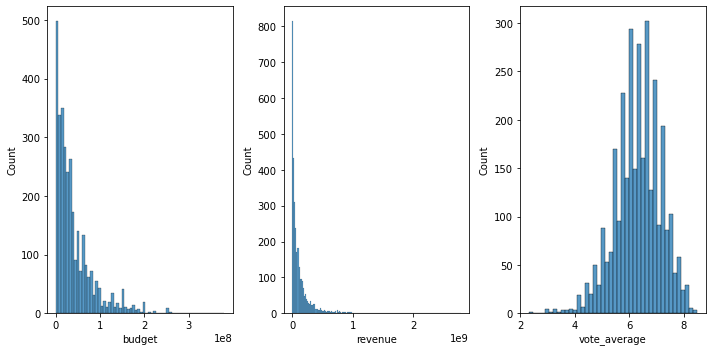

In [78]:
fig, axs = plt.subplots(1, 3, figsize = (10, 5))
sns.histplot(data = df, x ='budget', ax = axs[0])
sns.histplot(data = df, x ='revenue', ax = axs[1])
sns.histplot(data = df, x ='vote_average', ax = axs[2])
fig.tight_layout()

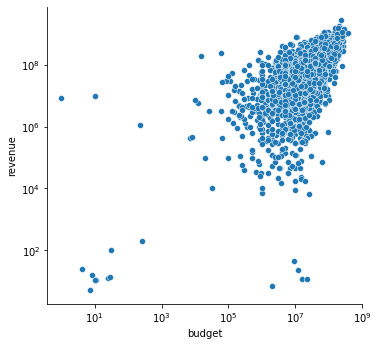

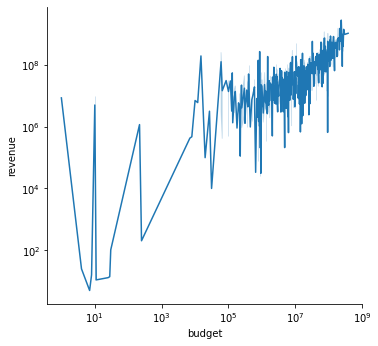

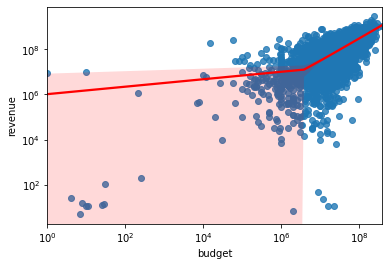

In [45]:
plot1 = sns.relplot(data = df, x = 'budget', y = 'revenue')
plot1.set(xscale = 'log')
plot1.set(yscale = 'log')
plt.show()
plot2 = sns.relplot(data = df, x='budget', y = 'revenue', kind = "line")
plot2.set(xscale = 'log')
plot2.set(yscale = 'log')
plt.show()
plot3 = sns.regplot(data = df, x='budget', y = 'revenue', line_kws={'color': 'red'})
plot3.set(xscale = 'log')
plot3.set(yscale = 'log')
plt.show()


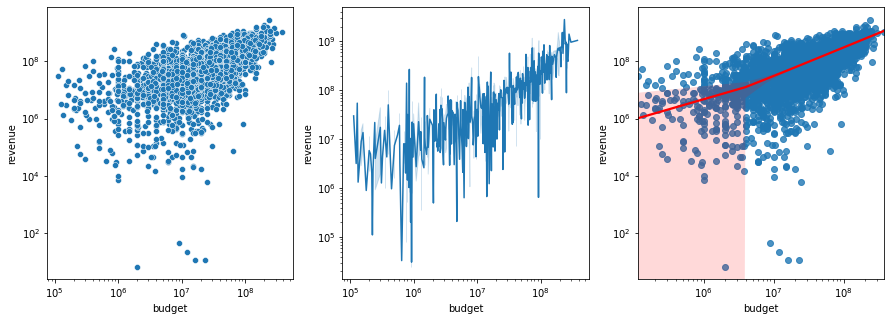

,budget,revenue
budget,1.000000,0.705075
revenue,0.705075,1.000000


In [278]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))

plot1 = sns.scatterplot(data = df[df['budget'] > 100000], x = 'budget', y = 'revenue', ax = axs[0])
plot1.set(xscale = 'log')
plot1.set(yscale = 'log')
plot2 = sns.lineplot(data = df[df['budget'] > 100000], x='budget', y = 'revenue', ax = axs[1])
plot2.set(xscale = 'log')
plot2.set(yscale = 'log')
plot3 = sns.regplot(data = df[df['budget'] > 100000], x='budget', y = 'revenue', line_kws={'color': 'red'}, ax = axs[2])
plot3.set(xscale = 'log')
plot3.set(yscale = 'log')
plt.show()
df[['budget', 'revenue']].corr()

In [59]:
df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.705075
revenue,0.705075,1.000000


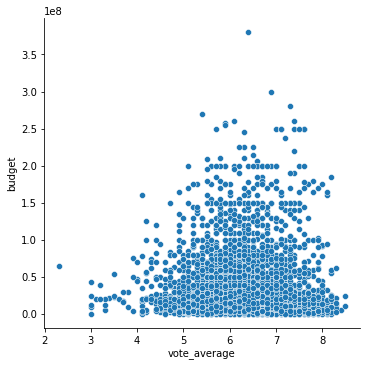

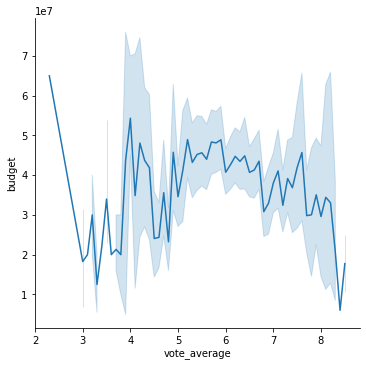

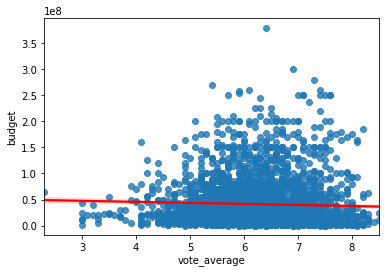

,budget,vote_average
budget,1.000000,-0.038445
vote_average,-0.038445,1.000000


In [64]:
plot1 = sns.relplot(data = df, x = 'vote_average', y = 'budget')
plt.show()
plot2 = sns.relplot(data = df, x = 'vote_average', y = 'budget', kind = 'line')
plt.show()
plot3 = sns.regplot(data = df, x = 'vote_average', y = 'budget', line_kws = {'color': 'red'})
plt.show()

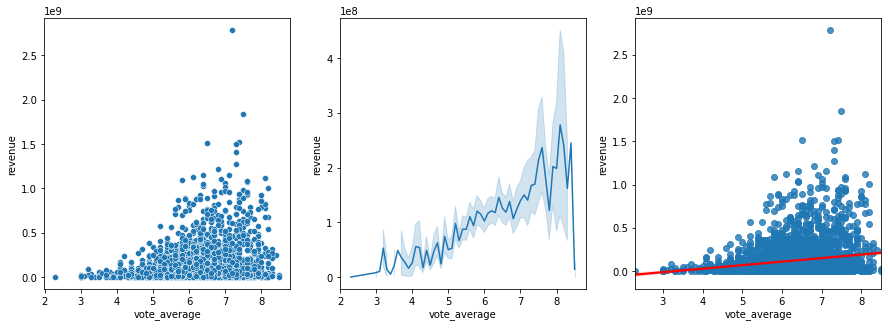

In [280]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
plot1 = sns.scatterplot(data = df, x = 'vote_average', y = 'revenue', ax = axs[0])
plot2 = sns.lineplot(data = df, x = 'vote_average', y = 'revenue', ax = axs[1])
plot3 = sns.regplot(data = df, x = 'vote_average', y = 'revenue', line_kws = {'color': 'red'}, ax = axs[2])
plt.show()

<AxesSubplot:xlabel='vote_class', ylabel='revenue'>

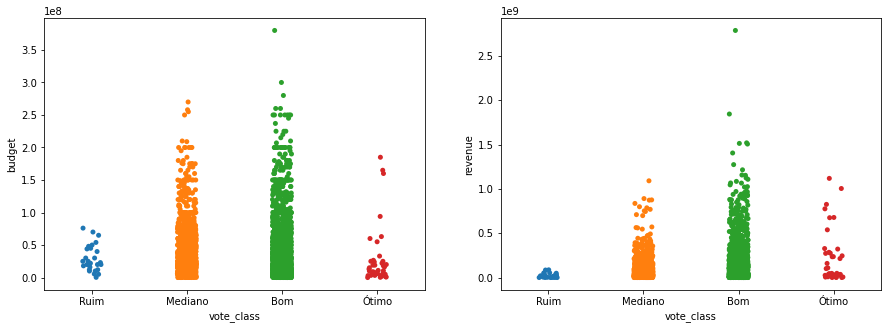

In [93]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
sns.stripplot(x = 'vote_class', y = 'budget', data = df, ax = axs[0])
sns.stripplot(x = 'vote_class', y = 'revenue', data = df, ax = axs[1])

<AxesSubplot:xlabel='year', ylabel='revenue'>

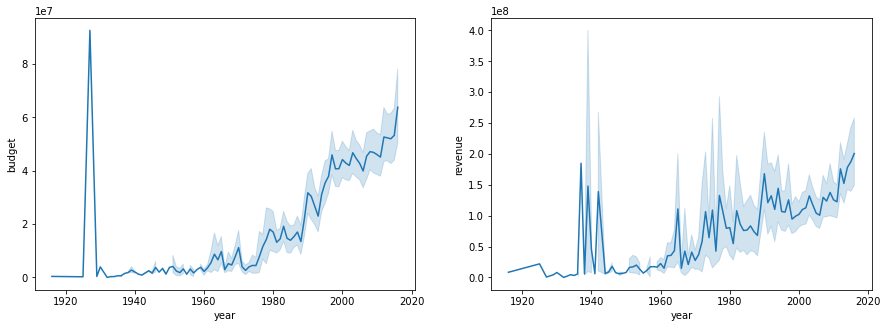

In [100]:
fig, axs = plt.subplots(1, 2, figsize= (15,5))
sns.lineplot(x = 'year', y = 'budget', data = df, ax = axs[0])
sns.lineplot(x = 'year', y = 'revenue', data = df, ax = axs[1])

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

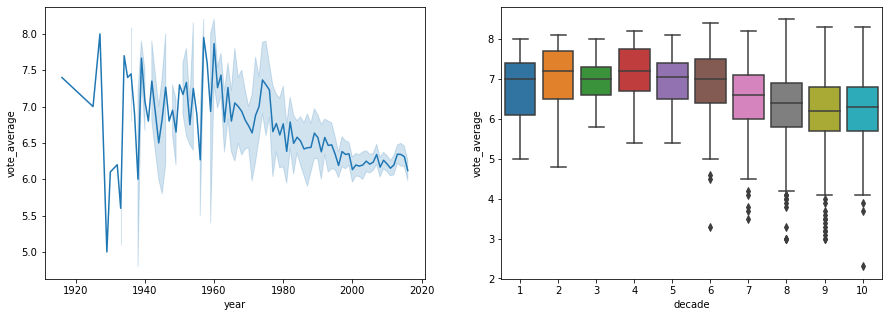

In [103]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(x = 'year', y = 'vote_average', data = df, ax = axs[0])
sns.boxplot(x = 'decade', y = 'vote_average', data = df, ax = axs[1])

In [127]:
df_filter = df[df.duplicated(['country'], keep = False)]
df_filter


,title,budget,revenue,vote_average,vote_class,country,genre,year,decade
movie_id,,,,,,,,,
3059,Intolerance,385907.0,8394751.0,7.4,Bom,US,Drama,1916,1
3060,The Big Parade,245000.0,22000000.0,7.0,Bom,US,Drama,1925,1
19,Metropolis,92620000.0,650422.0,8.0,Bom,DE,Drama,1927,1
65203,The Broadway Melody,379000.0,4358000.0,5.0,Mediano,US,Drama,1929,1
22301,Hell's Angels,3950000.0,8000000.0,6.1,Bom,US,Drama,1930,1
...,...,...,...,...,...,...,...,...,...
290595,The Huntsman: Winter's War,115000000.0,164602163.0,6.0,Mediano,US,Adventure,2016,10
153518,The Angry Birds Movie,73000000.0,349779543.0,5.9,Mediano,FI,Animation,2016,10
47933,Independence Day: Resurgence,165000000.0,389681935.0,4.9,Mediano,US,Adventure,2016,10


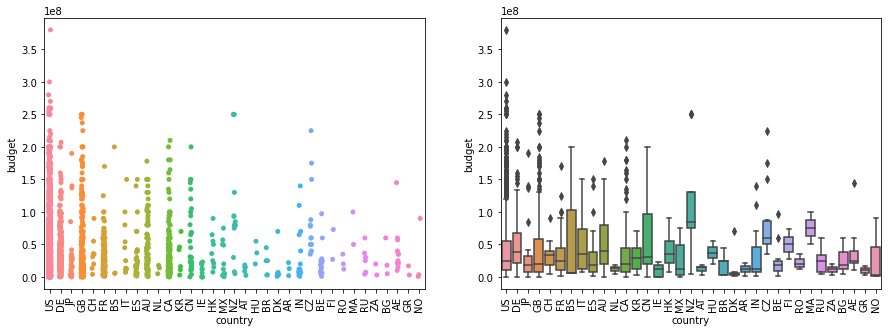

In [139]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

g1 = sns.stripplot(x = 'country', y = 'budget', data = df_filter, ax= axs[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation = 90)
g2 = sns.boxplot(x = 'country', y = 'budget', data = df_filter, ax = axs[1])
g2.set_xticklabels(g2.get_xticklabels(), rotation = 90)
plt.show()

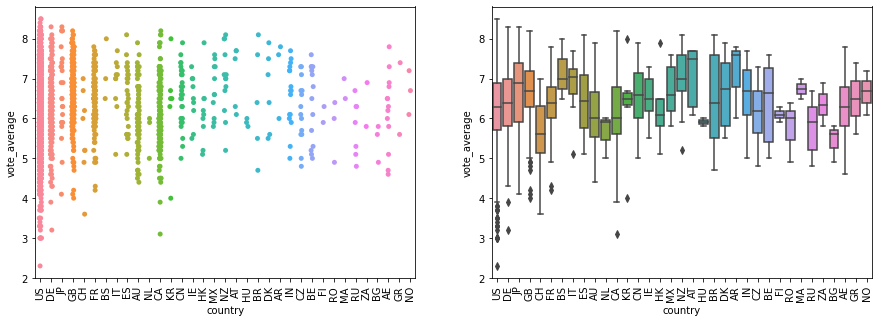

In [143]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

g1 = sns.stripplot(x = 'country', y = 'vote_average', data = df_filter, ax = axs[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation = 90)
g2 = sns.boxplot(x = 'country', y = 'vote_average', data = df_filter, ax = axs[1])
g2.set_xticklabels(g2.get_xticklabels(), rotation = 90)
plt.show()

C:\Users\ribas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ribas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ribas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-184-5b5722

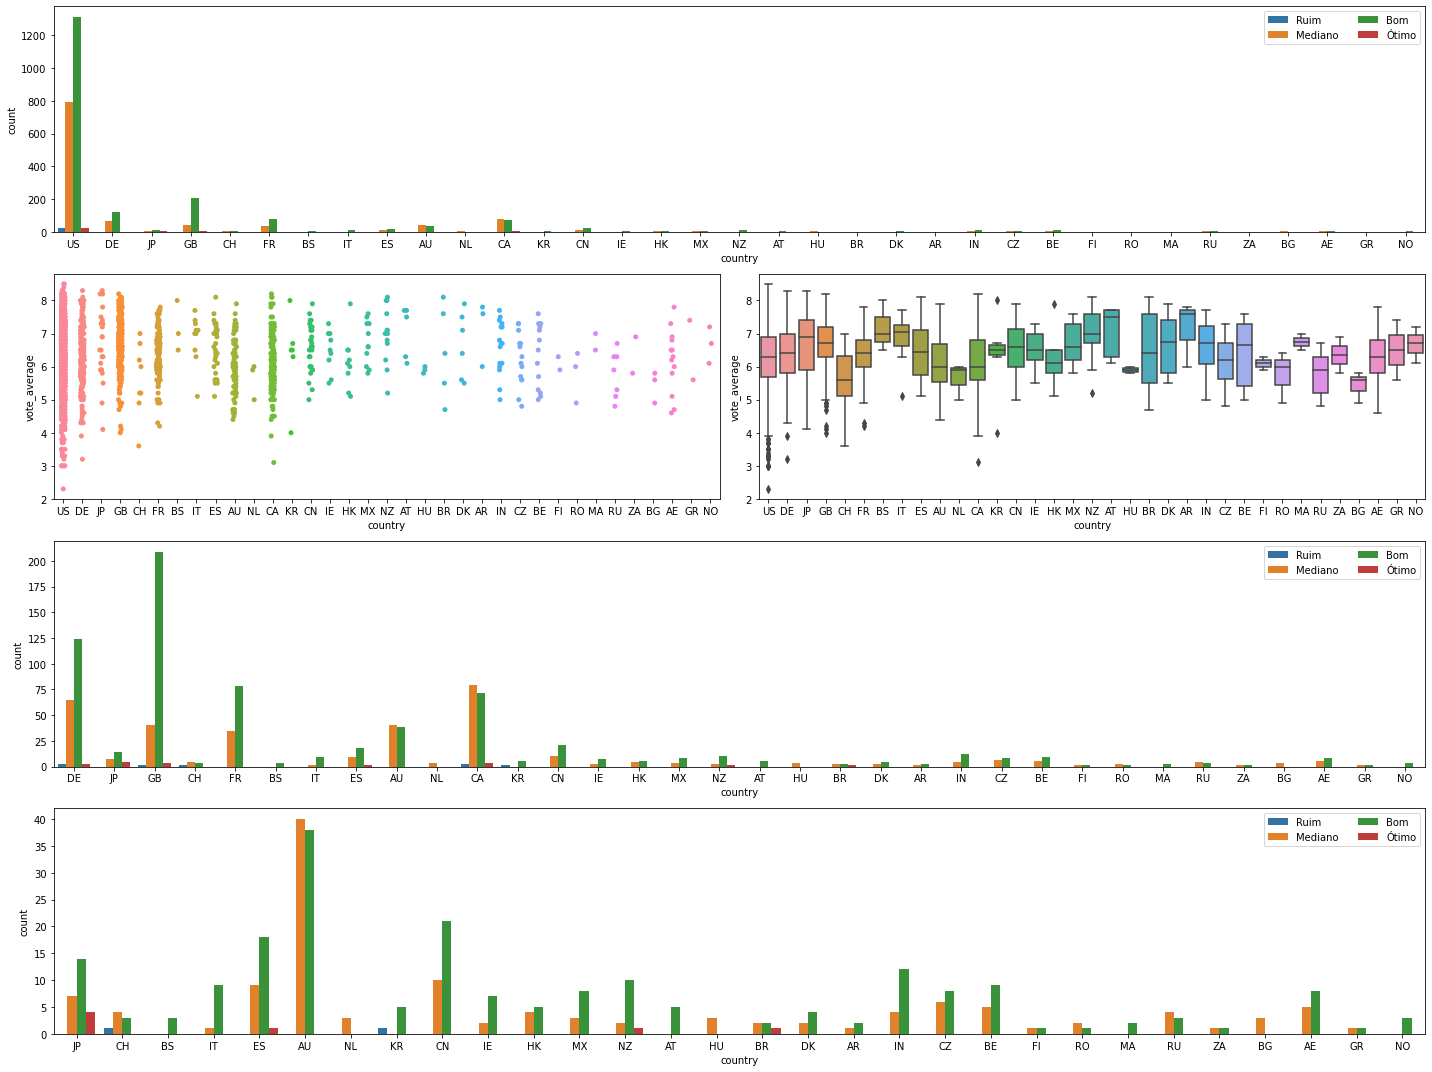

In [184]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)

ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2)
sns.countplot( 'country', hue = 'vote_class',data=df_filter, ax = ax1)
ax1.legend(ncol = 2, loc = 'upper right')
# Plot 2
ax2 = plt.subplot2grid((4, 2), (1, 0), colspan=1)
sns.stripplot( 'country','vote_average', data=df_filter, ax = ax2)

# Plot 3
ax3 = plt.subplot2grid((4, 2), (1, 1), colspan=1)
sns.boxplot( 'country','vote_average', data=df_filter, ax = ax3)

# Plot 4
ax4 = plt.subplot2grid((4, 2), (2, 0), colspan = 2)
sns.countplot('country', hue = 'vote_class', data = df_filter[df['country'] != 'US'], ax = ax4)
ax4.legend(ncol = 2, loc = 'upper right')

ax5 = plt.subplot2grid((4, 2), (3, 0), colspan = 2)
sns.countplot('country', hue = 'vote_class', 
              data = df_filter.loc[(df['country'] != 'US') & 
                                   (df['country'] != 'DE') & 
                                   (df['country'] != 'GB') & 
                                   (df['country'] != 'CA') & 
                                   (df['country'] != 'FR')], ax = ax5)
ax5.legend(ncol = 2, loc = 'upper right')
# Show the graph
plt.tight_layout()
plt.show()

<ipython-input-222-b78dfb6e0988>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot1 = sns.countplot(x = 'decade', hue = 'country', data = df_filter[df['country'] != 'US'][df_filter['decade'] < 6], ax = axs[0], palette= 'Set3')
<ipython-input-222-b78dfb6e0988>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot1 = sns.countplot(x = 'decade', hue = 'country', data = df_filter[df['country'] != 'US'][df_filter['decade'] < 6], ax = axs[0], palette= 'Set3')
No handles with labels found to put in legend.
<ipython-input-222-b78dfb6e0988>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot2 = sns.countplot(x = 'decade', hue = 'country', data = df_filter[df['country'] != 'US'][df_filter['decade'] >= 6],ax = axs[1], palette = 'Set3')
<ipython-input-222-b78dfb6e0988>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot2 = sns.countplot(x = 'decade', hue = 'countr

<Figure size 1440x360 with 0 Axes>

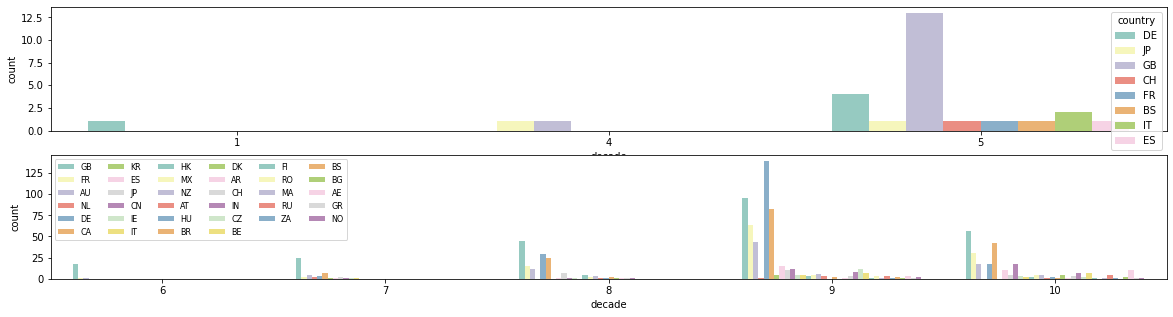

In [222]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

fig, axs = plt.subplots(2, 1, figsize = (20, 5))
plot1 = sns.countplot(x = 'decade', hue = 'country', data = df_filter[df['country'] != 'US'][df_filter['decade'] < 6], ax = axs[0], palette= 'Set3')
plot2 = sns.countplot(x = 'decade', hue = 'country', data = df_filter[df['country'] != 'US'][df_filter['decade'] >= 6],ax = axs[1], palette = 'Set3')
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1), ncol=6, fontsize = '8')
plt.show()


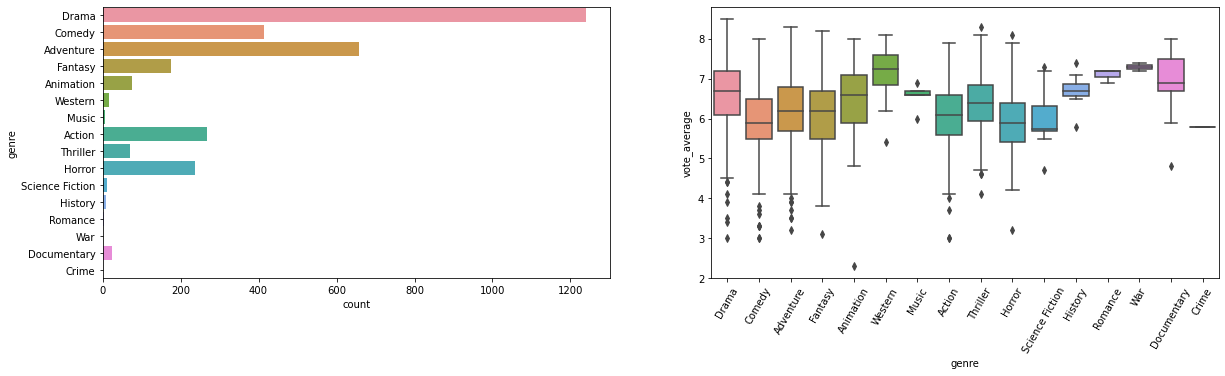

genre
Action             7.9
Adventure          8.3
Animation          8.0
Comedy             8.0
Crime              5.8
Documentary        8.0
Drama              8.5
Fantasy            8.2
History            7.4
Horror             8.1
Music              6.9
Romance            7.2
Science Fiction    7.3
Thriller           8.3
War                7.4
Western            8.1
Name: vote_average, dtype: float64
Drama              1239
Adventure           658
Comedy              413
Action              269
Horror              237
Fantasy             175
Animation            75
Thriller             71
Documentary          25
Western              16
Science Fiction      12
History               8
Music                 5
Romance               3
War                   2
Crime                 1
Name: genre, dtype: int64


In [265]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))
plot1 = sns.countplot(y = 'genre', data = df, ax = axs[0])
plot2 = sns.boxplot(x = 'genre', y = 'vote_average', data = df, ax = axs[1])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation = 60)
plt.show()
print(df['vote_average'].groupby(df['genre']).max())
print(df['genre'].value_counts())

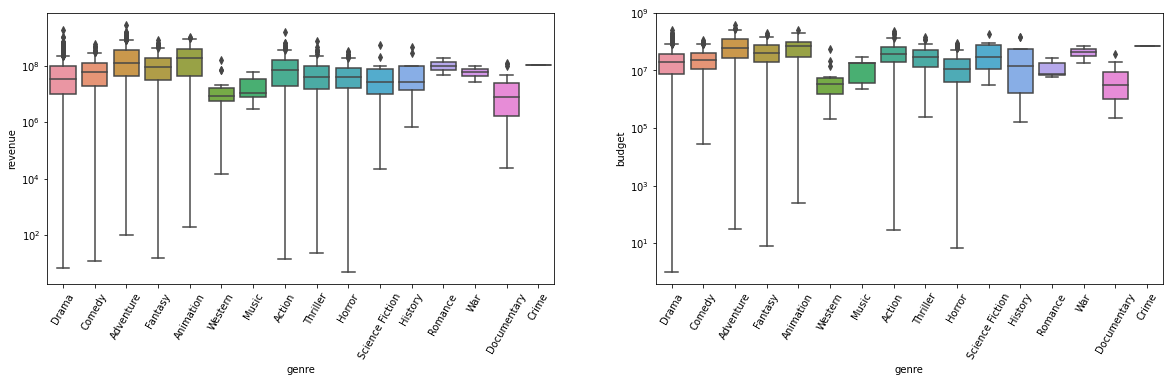

In [268]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))
plot1 = sns.boxplot(x = 'genre', y = 'revenue', data = df, ax = axs[0])
plot1.set(yscale = 'log')
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 60)
plot2 = sns.boxplot(x = 'genre', y = 'budget', data = df, ax = axs[1])
plot2.set(yscale = 'log')
plot2.set_xticklabels(plot2.get_xticklabels(), rotation = 60)
plt.show()

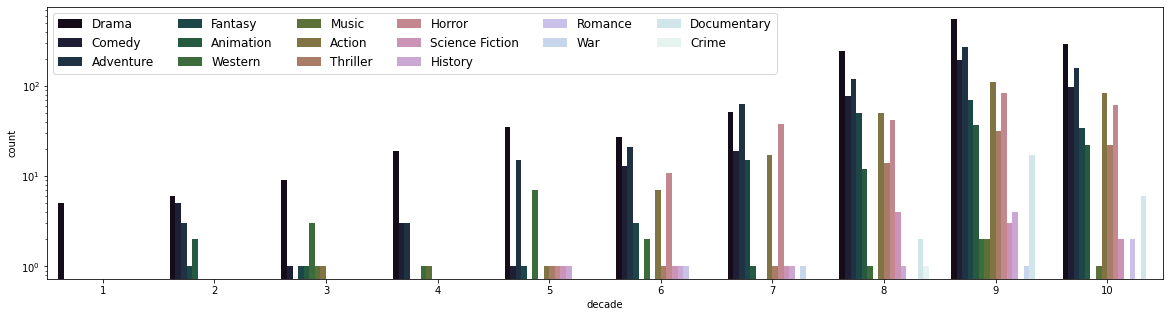

In [277]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

plot1 = sns.countplot(x = 'decade', hue = 'genre', data = df, palette = "cubehelix")
plot1.set(yscale = 'log')
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1), ncol=6, fontsize = '12')
